# Import Library

In [2]:
# Dataset preprocessing lib
import pandas as pd
import numpy as np

# Plot Lib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Helper Function

In [17]:
# Count the unique no of attributes in Retail data
def unique_counts(retail_df):
    # Iterasi melalui columns
   for i in retail_df.columns:
        # Count berapa unique value yang ada
       count = retail_df[i].nunique()
       print(i, ": ", count)

# Load Dataset

In [5]:
retail_df = pd.read_excel("dataset.xlsx")

In [6]:
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [7]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# Check ada null value atau ngga?
retail_df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [10]:
# Check ada null value atau ngga?
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Dataset Preprocessing

## Hitung Total Price

In [11]:
retail_df["Total_Price"] = retail_df["Quantity"] * retail_df["UnitPrice"]
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


## Cleaning Dataset

In [12]:
# Hanya ambil dataset yang tidak null
online_retail_df = retail_df[np.isfinite(retail_df["CustomerID"])]

In [13]:
# Check apakah ada missing value atau ngga
online_retail_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Total_Price    0
dtype: int64

## Transform Datetime Type

In [14]:
# Convert the date in YYYY-mm-dd HH:MM format and store that date in 'Date' column
online_retail_df['Date']=pd.to_datetime(retail_df['InvoiceDate'], format = '%Y-%m-%d %H:%M:%S')

<ipython-input-14-728fa0cb5121>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail_df['Date']=pd.to_datetime(retail_df['InvoiceDate'], format = '%Y-%m-%d %H:%M:%S')


In [15]:
online_retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010-12-01 08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010-12-01 08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12-01 08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12-01 08:28:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12-01 08:34:00


In [18]:
unique_counts(online_retail_df)

InvoiceNo :  22190
StockCode :  3684
Description :  3896
Quantity :  436
InvoiceDate :  20460
UnitPrice :  620
CustomerID :  4372
Country :  37
Total_Price :  4041
Date :  20460


## Filter Quantity > 0

In [20]:
#For the sake of calculating recency and frequency, drop the rows with negative values of Quantity and store the data in final_df
final_retail = online_retail_df[online_retail_df['Quantity'] > 0]

In [21]:
final_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   Total_Price  397924 non-null  float64       
 9   Date         397924 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 33.4+ MB


## Calculate RFM Value

In [19]:
import datetime as dt
# 10-12-2011 sebagai tanggal hari ini
NOW = dt.datetime(2011, 12, 10)

In [ ]:
# Function biasa
def check_status(status):
    return status
# Lambda function
lambda status: return status

In [24]:
# Menghitung RFM
rfmTable = final_retail.groupby("CustomerID").agg({
    # Recency
    "Date": lambda x: (NOW - x.max()).days,
    # Frequqncy
    "InvoiceNo": lambda x: len(x),
    # Monetary
    "Total_Price": lambda x: x.sum()
})

In [25]:
rfmTable.head(10)

,Date,InvoiceNo,Total_Price
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


In [26]:
# Rename value
rfmTable.rename(columns={'Date': 'recency',
                         'InvoiceNo': 'frequency',
                       'Total_Price': 'monetary_value'}, inplace=True)

In [27]:
rfmTable.head(10)

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


# Find TOP 10 customer berdasarkan RFM Analysis

In [28]:
rfmTable.sort_values(['frequency', 'monetary_value'], ascending=[False, False], inplace=True)

In [29]:
rfmTable.head(10)

,recency,frequency,monetary_value
CustomerID,,,
17841.0,1,7847,40991.57
14911.0,1,5677,143825.06
14096.0,4,5111,65164.79
12748.0,0,4596,33719.73
14606.0,1,2700,12156.65
15311.0,0,2379,60767.90
14646.0,1,2080,280206.02
13089.0,2,1818,58825.83
13263.0,1,1677,7454.07


# Model Training

## Import Library for Training Model

In [30]:
from sklearn.cluster import KMeans # Import model
from sklearn.preprocessing import StandardScaler # Import preprocessing

In [31]:
scaler = StandardScaler()

In [33]:
rfmTable.head(10)

,recency,frequency,monetary_value
CustomerID,,,
17841.0,1,7847,40991.57
14911.0,1,5677,143825.06
14096.0,4,5111,65164.79
12748.0,0,4596,33719.73
14606.0,1,2700,12156.65
15311.0,0,2379,60767.90
14646.0,1,2080,280206.02
13089.0,2,1818,58825.83
13263.0,1,1677,7454.07


In [32]:
X_scaled = scaler.fit_transform( rfmTable )

In [36]:
X_scaled[:10]

array([[-0.91044914, 33.90046966,  4.3325755 ],
       [-0.91044914, 24.41481448, 15.7747762 ],
       [-0.88044801, 21.94067585,  7.02231048],
       [-0.92044952, 19.68947197,  3.52344364],
       [-0.91044914, 11.40154469,  1.12413687],
       [-0.92044952,  9.99836713,  6.53307202],
       [-0.91044914,  8.6913575 , 30.94977723],
       [-0.90044877,  7.54608484,  6.31697943],
       [-0.91044914,  6.92973582,  0.60088453],
       [-0.84044651,  6.75488503,  5.5048778 ]])

In [37]:
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [41]:
rfmTable["cluster_new"] = clusters.labels_

In [42]:
rfmTable.head(10)

,recency,frequency,monetary_value,cluster_new
CustomerID,,,,
17841.0,1,7847,40991.57,2
14911.0,1,5677,143825.06,2
14096.0,4,5111,65164.79,2
12748.0,0,4596,33719.73,2
14606.0,1,2700,12156.65,0
15311.0,0,2379,60767.90,2
14646.0,1,2080,280206.02,2
13089.0,2,1818,58825.83,2
13263.0,1,1677,7454.07,0


## Elbow Method

In [43]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [44]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [45]:
clusters_df.head(10)

,num_clusters,cluster_errors
0,1,13017.000000
1,2,8996.762762
2,3,5453.122485
3,4,4000.647594
4,5,2958.445965
5,6,2371.441752
6,7,1923.448846
7,8,1674.501637
8,9,1494.668151


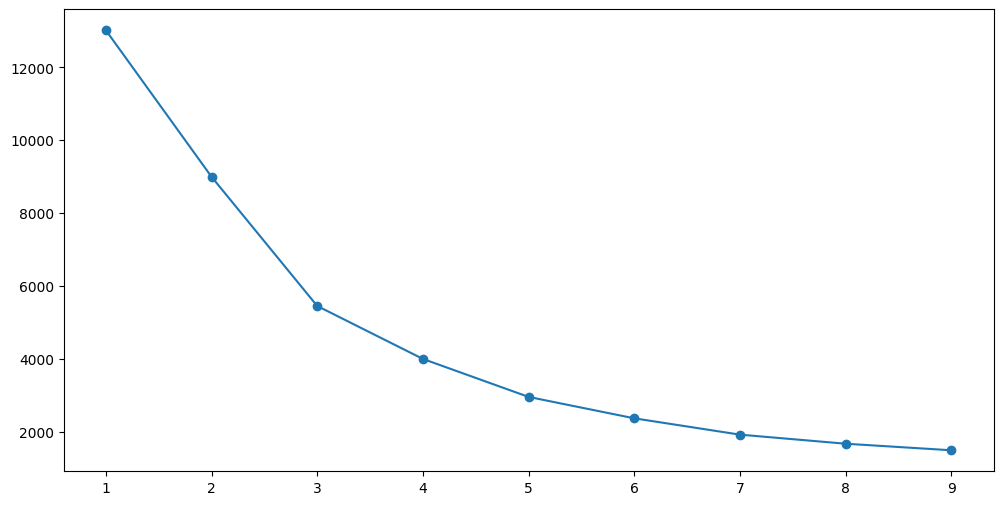

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

## Training K-Means Berdasarkan Elbow Method

In [49]:
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )
rfmTable["cluster_label"] = clusters.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [52]:
rfmTable.groupby('cluster_label').mean()

,recency,frequency,monetary_value,cluster_new
cluster_label,,,,
0,40.898644,103.079174,2028.480799,0.0
1,246.813889,27.750926,636.501112,1.0
2,4.000000,2566.000000,126118.310000,2.0


# Final Analysis

In [51]:
rfmTable_0 = rfmTable[rfmTable.cluster_label == 0]
rfmTable_0.head(10)

,recency,frequency,monetary_value,cluster_new,cluster_label
CustomerID,,,,,
14606.0,1,2700,12156.65,0,0
13263.0,1,1677,7454.07,0,0
14298.0,8,1637,51527.30,0,0
15039.0,9,1502,19914.44,0,0
18118.0,10,1279,5653.82,0,0
14159.0,19,1204,4693.01,0,0
14796.0,1,1141,8022.49,0,0
16033.0,5,1137,8816.40,0,0
15005.0,15,1119,6316.57,0,0


Hasil analisa cluster 0:
- mereka gaspending banyak, belanja dia bulanan.
- masih potential customer yang bisa kita improve untuk lebih sering beli.

In [53]:
rfmTable_1 = rfmTable[rfmTable.cluster_label == 1]
rfmTable_1.head(10)

,recency,frequency,monetary_value,cluster_new,cluster_label
CustomerID,,,,,
17850.0,372,297,5391.21,1,1
15644.0,166,238,813.00,1,1
14573.0,179,235,1653.42,1,1
15808.0,306,208,3734.97,1,1
15379.0,169,194,3703.29,1,1
17341.0,156,183,781.36,1,1
17472.0,191,181,710.29,1,1
14669.0,241,170,1269.99,1,1
15574.0,177,168,702.25,1,1


Hasil Analisa Cluster 1:
- Merupakan customer yang jarang melakukan transaksi
- low priority customer karena spending ga banyak

In [54]:
rfmTable_2 = rfmTable[rfmTable.cluster_label == 2]
rfmTable_2.head(10)

,recency,frequency,monetary_value,cluster_new,cluster_label
CustomerID,,,,,
17841.0,1,7847,40991.57,2,2
14911.0,1,5677,143825.06,2,2
14096.0,4,5111,65164.79,2,2
12748.0,0,4596,33719.73,2,2
15311.0,0,2379,60767.90,2,2
14646.0,1,2080,280206.02,2,2
13089.0,2,1818,58825.83,2,2
14156.0,9,1400,117379.63,2,2
17511.0,2,963,91062.38,2,2


Hasil Analisa Cluster 2:
- merupakan customer loyal dengan gap transaction yang minim, high spending, dan juga high frequency
- potential customer yang harus diperhatikan